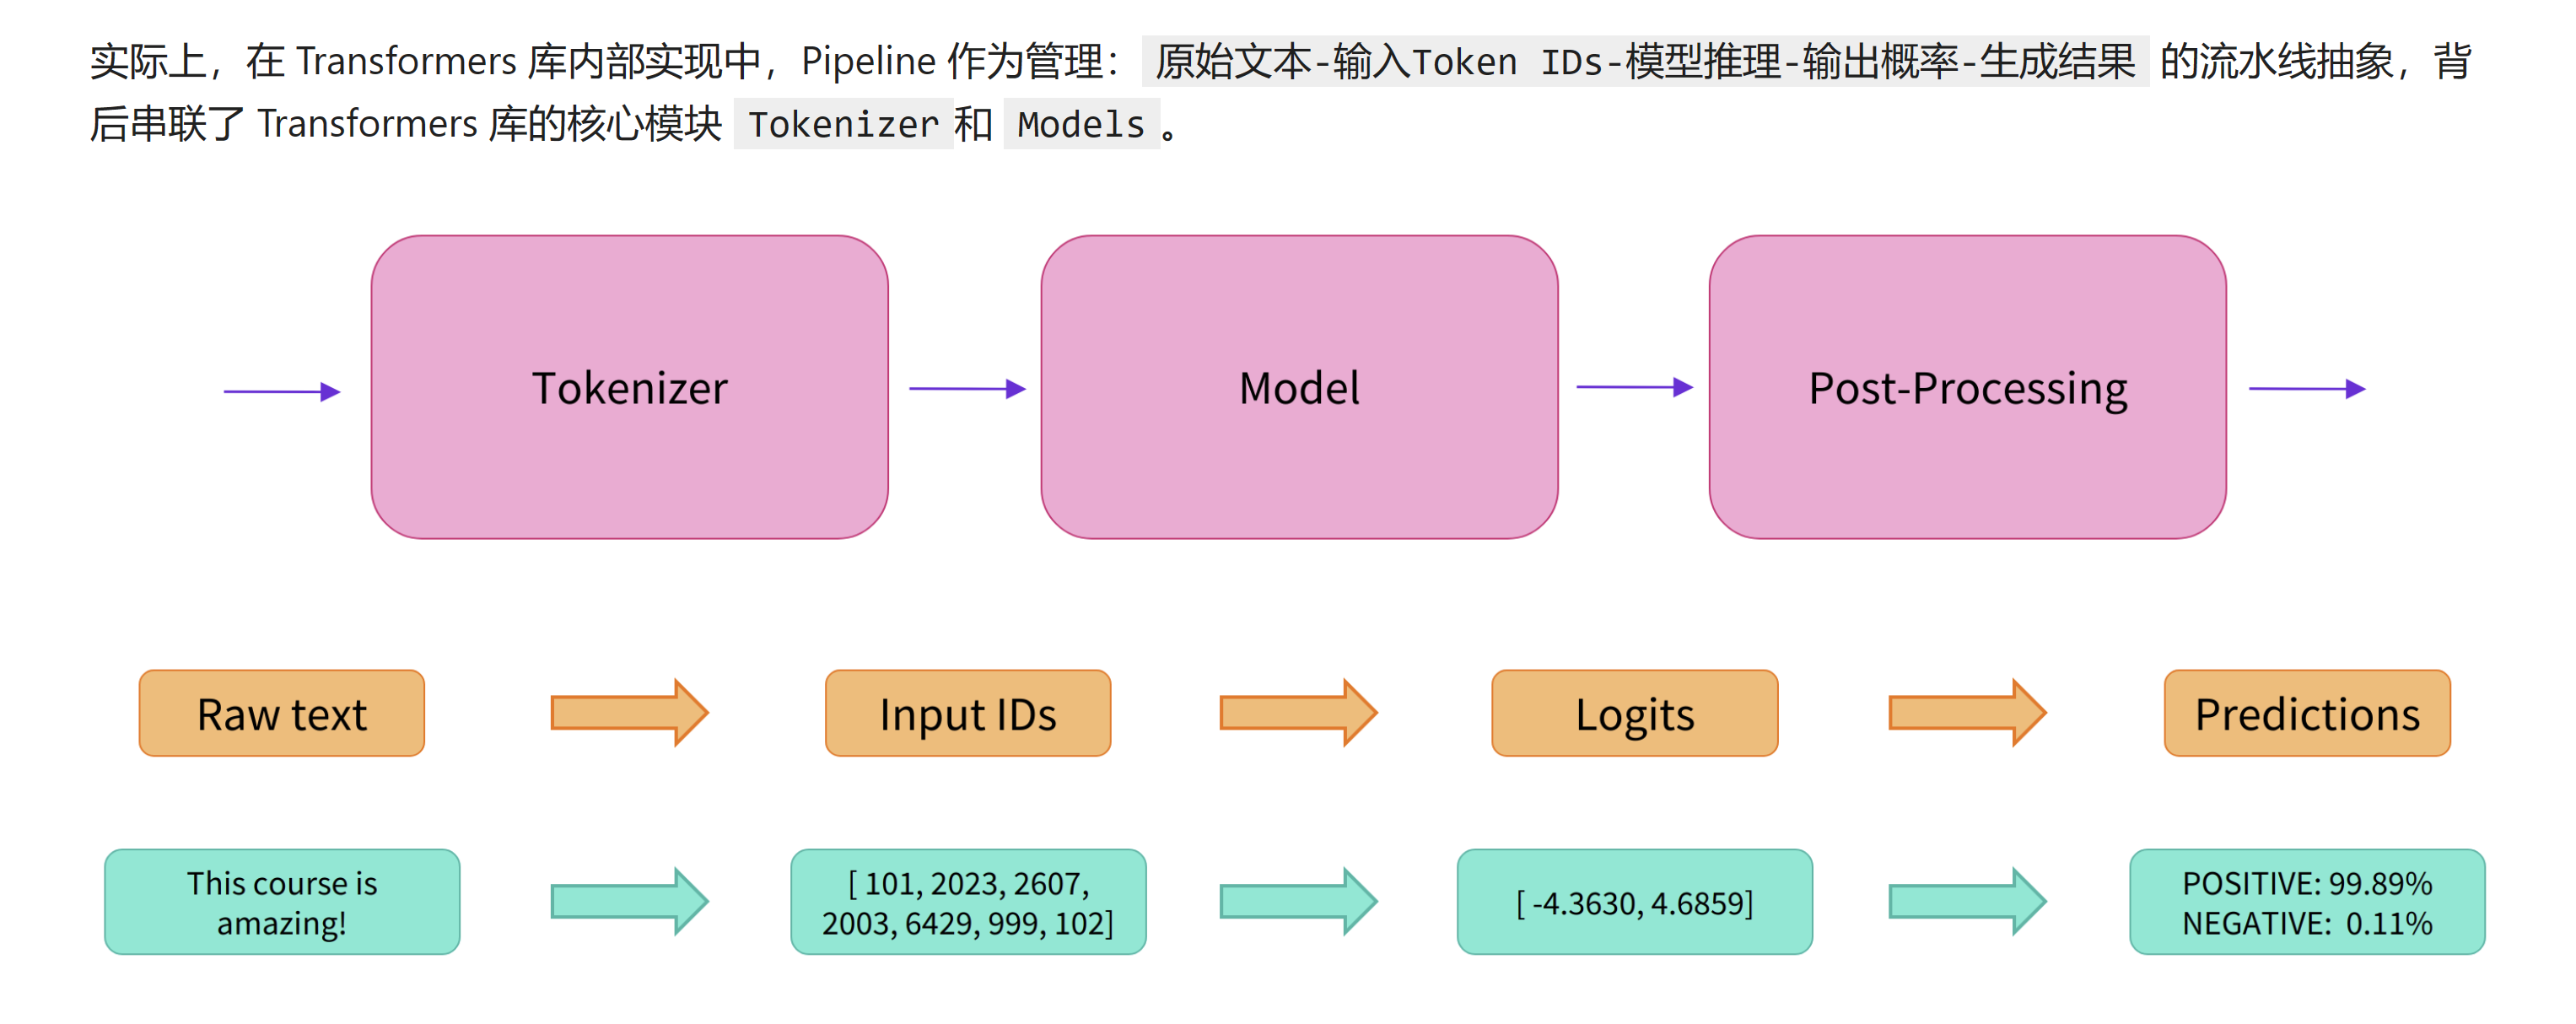

模型主页：https://huggingface.co/gpt2

In [1]:
from transformers import pipeline

prompt = "Hugging Face is a community-based open-source platform for machine learning."
generator = pipeline(task="text-generation", model="gpt2")
generator(prompt)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hugging Face is a community-based open-source platform for machine learning. The main goal of this project is to bring it into production as soon as possible. After I had completed all the testing at the site, I would give feedback on the'}]

设置文本生成返回条数

In [2]:
prompt = "You are very smart"
generator = pipeline(task="text-generation", model="gpt2", num_return_sequences=3)

In [3]:
generator(prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "You are very smart, I just don't have those skills and I'm just out there looking for help. But there are also some people like that who are kind of smart who have a lot of experience and they are willing to show off their skills"},
 {'generated_text': 'You are very smart and can do things which aren\'t possible for you," she wrote.'},
 {'generated_text': 'You are very smart, and I love the money," they said, adding, "You get so much attention for being stupid. Why you should be smart is hard to explain."\n\nWhile a recent Gallup poll found 80 percent of Americans think Trump'}]

In [4]:
generator(prompt, num_return_sequences=2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'You are very smart so you deserve to learn the language." His partner, Hoda Shuk, agreed, and he took another step forward."My daughter may know a few English words from him, but we don\'t always know it," he said'},
 {'generated_text': 'You are very smartly playing the game you know and trust, so go ahead and do some research. I like to know things, so go ahead and do some research. I really like the fact that you can be so happy knowing I am able'}]

设置文本生成最大长度

In [5]:
generator(prompt, num_return_sequences=2, max_length=16)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'You are very smart. Your skill is only valuable if you have a strong intuition'},
 {'generated_text': 'You are very smart." (Dumbledore, on his way out of the castle'}]

使用 BERT-Base-Chinese 实现中文补全

模型主页：https://huggingface.co/bert-base-chinese

In [6]:
from transformers import pipeline

fill_mask = pipeline(task="fill-mask", model="bert-base-chinese")

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

In [7]:
text = "人民是[MASK]可战胜的"

fill_mask(text, top_k=1)

[{'score': 0.9203746318817139,
  'token': 679,
  'token_str': '不',
  'sequence': '人 民 是 不 可 战 胜 的'}]

设置文本补全的条数

In [8]:
text = "美国的首都是[MASK]"

fill_mask(text, top_k=1)

[{'score': 0.7596935033798218,
  'token': 8043,
  'token_str': '？',
  'sequence': '美 国 的 首 都 是 ？'}]

In [9]:
text = "巴黎是[MASK]国的首都。"
fill_mask(text, top_k=1)

[{'score': 0.9911921620368958,
  'token': 3791,
  'token_str': '法',
  'sequence': '巴 黎 是 法 国 的 首 都 。'}]

In [10]:
text = "美国的首都是[MASK]"
fill_mask(text, top_k=3)

[{'score': 0.7596935033798218,
  'token': 8043,
  'token_str': '？',
  'sequence': '美 国 的 首 都 是 ？'},
 {'score': 0.21126730740070343,
  'token': 511,
  'token_str': '。',
  'sequence': '美 国 的 首 都 是 。'},
 {'score': 0.02683424949645996,
  'token': 8013,
  'token_str': '！',
  'sequence': '美 国 的 首 都 是 ！'}]

In [11]:
text = "美国的首都是[MASK][MASK][MASK]"

fill_mask(text, top_k=1)

[[{'score': 0.5740313529968262,
   'token': 5294,
   'token_str': '纽',
   'sequence': '[CLS] 美 国 的 首 都 是 纽 [MASK] [MASK] [SEP]'}],
 [{'score': 0.4926777780056,
   'token': 5276,
   'token_str': '约',
   'sequence': '[CLS] 美 国 的 首 都 是 [MASK] 约 [MASK] [SEP]'}],
 [{'score': 0.9353274703025818,
   'token': 511,
   'token_str': '。',
   'sequence': '[CLS] 美 国 的 首 都 是 [MASK] [MASK] 。 [SEP]'}]]

使用 AutoClass 高效管理 Tokenizer 和 Model

使用 from_pretrained 方法加载指定 Model 和 Tokenizer

In [13]:
from transformers import AutoTokenizer, AutoModel

model_name = "bert-base-chinese"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

使用 BERT Tokenizer 编码文本
编码 (Encoding) 过程包含两个步骤：

分词：使用分词器按某种策略将文本切分为 tokens；
映射：将 tokens 转化为对应的 token IDs。

In [14]:
# 第一步：分词
sequence = "美国的首都是华盛顿特区"
tokens = tokenizer.tokenize(sequence)
print(tokens)

['美', '国', '的', '首', '都', '是', '华', '盛', '顿', '特', '区']


In [15]:
# 第二步：映射
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [16]:
print(token_ids)

[5401, 1744, 4638, 7674, 6963, 3221, 1290, 4670, 7561, 4294, 1277]


使用 Tokenizer.encode 方法端到端处理

In [17]:
token_ids_e2e = tokenizer.encode(sequence)

In [18]:
token_ids_e2e

[101, 5401, 1744, 4638, 7674, 6963, 3221, 1290, 4670, 7561, 4294, 1277, 102]

In [19]:
tokenizer.decode(token_ids)

'美 国 的 首 都 是 华 盛 顿 特 区'

In [20]:
tokenizer.decode(token_ids_e2e)

'[CLS] 美 国 的 首 都 是 华 盛 顿 特 区 [SEP]'

编解码多段文本

In [21]:
sequence_batch = ["美国的首都是华盛顿特区", "中国的首都是北京"]

In [22]:
token_ids_batch = tokenizer.encode(sequence_batch)

In [23]:
tokenizer.decode(token_ids_batch)

'[CLS] 美 国 的 首 都 是 华 盛 顿 特 区 [SEP] 中 国 的 首 都 是 北 京 [SEP]'

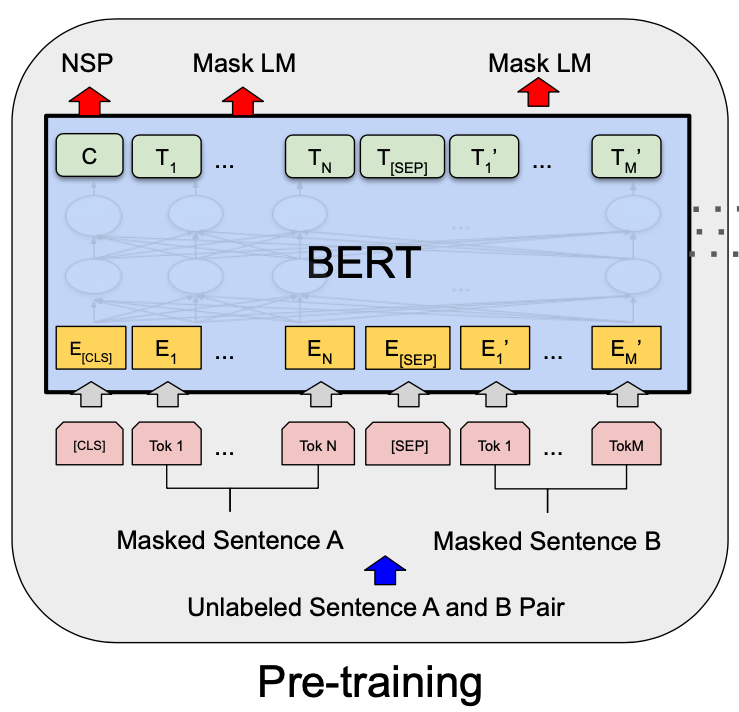

实操建议：直接使用 tokenizer.__call__ 方法完成文本编码 + 特殊编码补全
编码后返回结果：

input_ids: token_ids

token_type_ids: token_id 归属的句子编号

attention_mask: 指示哪些token需要被关注（注意力机制）

In [24]:
embedding_batch = tokenizer(sequence_batch)
print(embedding_batch)

{'input_ids': [[101, 5401, 1744, 4638, 7674, 6963, 3221, 1290, 4670, 7561, 4294, 1277, 102], [101, 704, 1744, 4638, 7674, 6963, 3221, 1266, 776, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [25]:
# 优化下输出结构
for key, value in embedding_batch.items():
    print(f"{key}: {value}\n")

input_ids: [[101, 5401, 1744, 4638, 7674, 6963, 3221, 1290, 4670, 7561, 4294, 1277, 102], [101, 704, 1744, 4638, 7674, 6963, 3221, 1266, 776, 102]]

token_type_ids: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

attention_mask: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]



添加新 Token
当出现了词表或嵌入空间中不存在的新Token，需要使用 Tokenizer 将其添加到词表中。 Transformers 库提供了两种不同方法：

add_tokens: 添加常规的正文文本 Token，以追加（append）的方式添加到词表末尾。
add_special_tokens: 添加特殊用途的 Token，优先在已有特殊词表中选择（bos_token, eos_token, unk_token, sep_token, pad_token, cls_token, mask_token）。如果预定义均不满足，则都添加到additional_special_tokens。

添加常规 Token
先查看已有词表，确保新添加的 Token 不在词表中：

In [26]:
len(tokenizer.vocab.keys())

21128

In [27]:
from itertools import islice

# 使用 islice 查看词表部分内容
for key, value in islice(tokenizer.vocab.items(), 10):
    print(f"{key}: {value}")

翟: 5427
嵬: 2320
祥: 4872
##stry: 11001
##傭: 14056
##浆: 16898
##雒: 20481
list: 9691
鼬: 7963
lifestyle: 12996


In [30]:
new_tokens = ["天干", "地支"]

In [31]:
# 将集合作差结果添加到词表中
new_tokens = set(new_tokens) - set(tokenizer.vocab.keys())

In [32]:
new_tokens

{'地支', '天干'}

In [33]:
tokenizer.add_tokens(list(new_tokens))

2

In [34]:
# 新增加了2个Token，词表总数由 21128 增加到 21130
len(tokenizer.vocab.keys())

21130

添加特殊Token（审慎操作）

In [35]:
new_special_token = {"sep_token": "NEW_SPECIAL_TOKEN"}

In [36]:
tokenizer.add_special_tokens(new_special_token)

1

In [37]:
# 新增加了1个特殊Token，词表总数由 21128 增加到 21131
len(tokenizer.vocab.keys())

21131

使用 save_pretrained 方法保存指定 Model 和 Tokeniz

借助 AutoClass 的设计理念，保存 Model 和 Tokenizer 的方法也相当高效便捷。

假设我们对bert-base-chinese模型以及对应的 tokenizer 做了修改，并更名为new-bert-base-chinese，方法如下：

tokenizer.save_pretrained("./models/new-bert-base-chinese")
model.save_pretrained("./models/new-bert-base-chinese")
保存 Tokenizer 会在指定路径下创建以下文件：

tokenizer.json: Tokenizer 元数据文件；
special_tokens_map.json: 特殊字符映射关系配置文件；
tokenizer_config.json: Tokenizer 基础配置文件，存储构建 Tokenizer 需要的参数；
vocab.txt: 词表文件；
added_tokens.json: 单独存放新增 Tokens 的配置文件。
保存 Model 会在指定路径下创建以下文件：

config.json：模型配置文件，存储模型结构参数，例如 Transformer 层数、特征空间维度等；
pytorch_model.bin：又称为 state dictionary，存储模型的权重。

In [38]:
tokenizer.save_pretrained("./models/new-bert-base-chinese")

('./models/new-bert-base-chinese/tokenizer_config.json',
 './models/new-bert-base-chinese/special_tokens_map.json',
 './models/new-bert-base-chinese/vocab.txt',
 './models/new-bert-base-chinese/added_tokens.json',
 './models/new-bert-base-chinese/tokenizer.json')

In [39]:
model.save_pretrained("./models/new-bert-base-chinese")